In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pickle
import os

CIFAR10_BATCH = 10000
CIFAR10_HEIGHT = 32
CIFAR10_WIDTH = 32
CIFAR10_CHANNELS = 3
CIFAR10_CLASSES = 10

#일단 한가지부터 테스트 후 여러개 해볼려고 하는 중이였어요^^
#cifar10_path = ['./datasets/cifar10-py/data_batch_1','./datasets/cifar10-py/data_batch_2','./datasets/cifar10-py/data_batch_3','./datasets/cifar10-py/data_batch_4','./datasets/cifar10-py/data_batch_5']
cifar10_path = './datasets/cifar10-py/data_batch_1'

[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 71  60  74 ...  68  69  68]
 [250 254 211 ... 215 255 254]
 [ 62  61  60 ... 130 130 131]]
(10000, 3072)
(10000, 32, 32, 3)


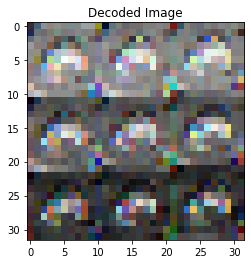

In [3]:
#for path in cifar10_path :
with open(cifar10_path, mode='rb') as f:
    data = pickle.load(f, encoding='bytes')
raw_img = data[b'data']
class_index = np.array(data[b'labels'])
print(raw_img)
print(raw_img.shape)   # 10000 x 3072 = 30720000

re_img = raw_img.reshape([-1, CIFAR10_HEIGHT, CIFAR10_WIDTH, CIFAR10_CHANNELS])
print(re_img.shape)
plt.imshow(re_img[0])
plt.title("Decoded Image")
plt.show()  
    

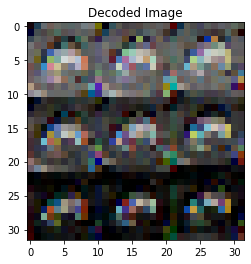

In [5]:
#2. tf.image의 아래의 함수를 참조 하여 Data Agument를 하여라
#
#- random_brightness
brightness_img = tf.image.random_brightness(re_img, 0.2)
plt.imshow(brightness_img[0])
plt.title("Brightness Image")
plt.show()  

    

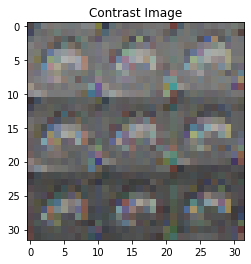

In [6]:
#- random_contrast

contrast_img = tf.image.random_contrast(re_img, 0.2, 0.5)
plt.imshow(contrast_img[0])
plt.title("Contrast Image")
plt.show()  

 

In [8]:
#- random_crop, resize

crop_img = tf.image.random_crop(re_img,size=(100, 100))
plt.imshow(crop_img[0])
plt.title("Crop Image")
plt.show()  



InvalidArgumentError: Incompatible shapes: [4] vs. [2] [Op:GreaterEqual]

In [ ]:
tf.image.random_crop_resize
plt.imshow(re_img[0])
plt.title("Decoded Image")
plt.show()  

  

In [ ]:
#- random_flip_left_right
tf.image.random_flip_left_right
plt.imshow(re_img[0])
plt.title("Decoded Image")
plt.show()  

 

In [ ]:
#- random_flip_up_down
tf.image.random_flip_up_down 
plt.imshow(re_img[0])
plt.title("Decoded Image")
plt.show()  


In [ ]:
with tf.io.TFRecordWriter("cifar10.tfrecord") as f:
    for i in range(CIFAR10_BATCH):
        image = Example(
            features=Features(
                feature={
                    "image": Feature(int64_list=Int64List(value=raw_img[i])),
                    "label": Feature(int64_list=Int64List(value=[class_index[i]]))
                }
            )
        )
    
        f.write(image.SerializeToString())